# Turkiye-student-evaluation

## Objective:
    To do feedback analysis on survey conducted between Turkey university students.

### **Dataset Information**
This data set contains a total 5820 evaluation scores provided by students from Gazi University in Ankara (Turkey). There is a total of 28 course specific questions and additional 5 attributes.

#### Attribute Information:

instr: Instructor's identifier; values taken from {1,2,3} \
class: Course code (descriptor); values taken from {1-13} \
repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...}\
attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}\
difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}\
Q1: The semester course content, teaching method and evaluation system were provided at the start.\
Q2: The course aims and objectives were clearly stated at the beginning of the period.\
Q3: The course was worth the amount of credit assigned to it.\
Q4: The course was taught according to the syllabus announced on the first day of class.\
Q5: The class discussions, homework assignments, applications and studies were satisfactory.\
Q6: The textbook and other courses resources were sufficient and up to date.\
Q7: The course allowed field work, applications, laboratory, discussion and other studies.\
Q8: The quizzes, assignments, projects and exams contributed to helping the learning.\
Q9: I greatly enjoyed the class and was eager to actively participate during the lectures.\
Q10: My initial expectations about the course were met at the end of the period or year.\
Q11: The course was relevant and beneficial to my professional development.\
Q12: The course helped me look at life and the world with a new perspective.\
Q13: The Instructor's knowledge was relevant and up to date.\
Q14: The Instructor came prepared for classes.\
Q15: The Instructor taught in accordance with the announced lesson plan.\
Q16: The Instructor was committed to the course and was understandable.\
Q17: The Instructor arrived on time for classes.\
Q18: The Instructor has a smooth and easy to follow delivery/speech.\
Q19: The Instructor made effective use of class hours.\
Q20: The Instructor explained the course and was eager to be helpful to students.\
Q21: The Instructor demonstrated a positive approach to students.\
Q22: The Instructor was open and respectful of the views of students about the course.\
Q23: The Instructor encouraged participation in the course.\
Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students.\
Q25: The Instructor responded to questions about the course inside and outside of the course.\
Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives.\
Q27: The Instructor provided solutions to exams and discussed them with students.\
Q28: The Instructor treated all students in a right and objective manner.

Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5}\

### Table of contents

>1.Importing Data libraies

>2.Reading the data

>3.Exploratory Data Analysis

>4.Principal component analysis

>5.Model Training


### 1.Importing Data libraies

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 99
from colorama import init, Fore, Back, Style


### 2.Loading the dataset


In [2]:
df = pd.read_csv("D:\\program\\Python\\projects\\ML\\turky student evaluation\\turkiye-student-evaluation_generic.csv")
df.head()

instr  class  nb.repeat  attendance  difficulty  Q1  Q2  Q3  Q4  Q5  Q6  \
0      1      2          1           0           4   3   3   3   3   3   3   
1      1      2          1           1           3   3   3   3   3   3   3   
2      1      2          1           2           4   5   5   5   5   5   5   
3      1      2          1           1           3   3   3   3   3   3   3   
4      1      2          1           0           1   1   1   1   1   1   1   

   Q7  Q8  Q9  Q10  Q11  Q12  Q13  Q14  Q15  Q16  Q17  Q18  Q19  Q20  Q21  \
0   3   3   3    3    3    3    3    3    3    3    3    3    3    3    3   
1   3   3   3    3    3    3    3    3    3    3    3    3    3    3    3   
2   5   5   5    5    5    5    5    5    5    5    5    5    5    5    5   
3   3   3   3    3    3    3    3    3    3    3    3    3    3    3    3   
4   1   1   1    1    1    1    1    1    1    1    1    1    1    1    1   

   Q22  Q23  Q24  Q25  Q26  Q27  Q28  
0    3    3    3    3    3    3    3  
1    3    3    3    3    3    3    3  
2    5    5    5    5    5    5    5  
3    3    3    3    3    3    3    3  
4    1    1    1    1    1    1    1

In [3]:
# statistical info
df.describe()

instr        class    nb.repeat   attendance   difficulty  \
count  5820.000000  5820.000000  5820.000000  5820.000000  5820.000000   
mean      2.485567     7.276289     1.214089     1.675601     2.783505   
std       0.718473     3.688175     0.532376     1.474975     1.348987   
min       1.000000     1.000000     1.000000     0.000000     1.000000   
25%       2.000000     4.000000     1.000000     0.000000     1.000000   
50%       3.000000     7.000000     1.000000     1.000000     3.000000   
75%       3.000000    10.000000     1.000000     3.000000     4.000000   
max       3.000000    13.000000     3.000000     4.000000     5.000000   

                Q1           Q2           Q3           Q4           Q5  \
count  5820.000000  5820.000000  5820.000000  5820.000000  5820.000000   
mean      2.929897     3.073883     3.178694     3.082474     3.105842   
std       1.341077     1.285251     1.253567     1.284594     1.278989   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     2.000000     2.000000   
50%       3.000000     3.000000     3.000000     3.000000     3.000000   
75%       4.000000     4.000000     4.000000     4.000000     4.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

                Q6           Q7           Q8           Q9          Q10  \
count  5820.000000  5820.000000  5820.000000  5820.000000  5820.000000   
mean      3.107388     3.066323     3.041924     3.165979     3.090722   
std       1.280807     1.279097     1.283481     1.268930     1.275309   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     2.000000     2.000000   
50%       3.000000     3.000000     3.000000     3.000000     3.000000   
75%       4.000000     4.000000     4.000000     4.000000     4.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

               Q11          Q12          Q13          Q14          Q15  \
count  5820.000000  5820.000000  5820.000000  5820.000000  5820.000000   
mean      3.183849     3.035567     3.242784     3.290893     3.287285   
std       1.295443     1.305772     1.264201     1.255373     1.253122   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     3.000000     3.000000   
50%       3.000000     3.000000     3.000000     3.000000     3.000000   
75%       4.000000     4.000000     4.000000     4.000000     4.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

               Q16          Q17          Q18          Q19          Q20  \
count  5820.000000  5820.000000  5820.000000  5820.000000  5820.000000   
mean      3.169588     3.398454     3.222509     3.261684     3.285395   
std       1.288015     1.267530     1.279799     1.268442     1.276848   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     3.000000     2.000000     3.000000     3.000000   
50%       3.000000     4.000000     3.000000     3.000000     3.000000   
75%       4.000000     4.000000     4.000000     4.000000     4.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

               Q21          Q22         Q23          Q24          Q25  \
count  5820.000000  5820.000000  5820.00000  5820.000000  5820.000000   
mean      3.307388     3.317526     3.20189     3.166838     3.312543   
std       1.269974     1.268358     1.27259     1.275909     1.257286   
min       1.000000     1.000000     1.00000     1.000000     1.000000   
25%       3.000000     3.000000     2.00000     2.000000     3.000000   
50%       3.000000     3.000000     3.00000     3.000000     3.000000   
75%       4.000000     4.000000     4.00000     4.000000     4.000000   
max       5.000000     5.000000     5.00000     5.000000     5.000000   

               Q26  

In [4]:
df.describe().T

count      mean       std  min  25%  50%   75%   max
instr       5820.0  2.485567  0.718473  1.0  2.0  3.0   3.0   3.0
class       5820.0  7.276289  3.688175  1.0  4.0  7.0  10.0  13.0
nb.repeat   5820.0  1.214089  0.532376  1.0  1.0  1.0   1.0   3.0
attendance  5820.0  1.675601  1.474975  0.0  0.0  1.0   3.0   4.0
difficulty  5820.0  2.783505  1.348987  1.0  1.0  3.0   4.0   5.0
Q1          5820.0  2.929897  1.341077  1.0  2.0  3.0   4.0   5.0
Q2          5820.0  3.073883  1.285251  1.0  2.0  3.0   4.0   5.0
Q3          5820.0  3.178694  1.253567  1.0  2.0  3.0   4.0   5.0
Q4          5820.0  3.082474  1.284594  1.0  2.0  3.0   4.0   5.0
Q5          5820.0  3.105842  1.278989  1.0  2.0  3.0   4.0   5.0
Q6          5820.0  3.107388  1.280807  1.0  2.0  3.0   4.0   5.0
Q7          5820.0  3.066323  1.279097  1.0  2.0  3.0   4.0   5.0
Q8          5820.0  3.041924  1.283481  1.0  2.0  3.0   4.0   5.0
Q9          5820.0  3.165979  1.268930  1.0  2.0  3.0   4.0   5.0
Q10         5820.0  3.090722  1.275309  1.0  2.0  3.0   4.0   5.0
Q11         5820.0  3.183849  1.295443  1.0  2.0  3.0   4.0   5.0
Q12         5820.0  3.035567  1.305772  1.0  2.0  3.0   4.0   5.0
Q13         5820.0  3.242784  1.264201  1.0  2.0  3.0   4.0   5.0
Q14         5820.0  3.290893  1.255373  1.0  3.0  3.0   4.0   5.0
Q15         5820.0  3.287285  1.253122  1.0  3.0  3.0   4.0   5.0
Q16         5820.0  3.169588  1.288015  1.0  2.0  3.0   4.0   5.0
Q17         5820.0  3.398454  1.267530  1.0  3.0  4.0   4.0   5.0
Q18         5820.0  3.222509  1.279799  1.0  2.0  3.0   4.0   5.0
Q19         5820.0  3.261684  1.268442  1.0  3.0  3.0   4.0   5.0
Q20         5820.0  3.285395  1.276848  1.0  3.0  3.0   4.0   5.0
Q21         5820.0  3.307388  1.269974  1.0  3.0  3.0   4.0   5.0
Q22         5820.0  3.317526  1.268358  1.0  3.0  3.0   4.0   5.0
Q23         5820.0  3.201890  1.272590  1.0  2.0  3.0   4.0   5.0
Q24         5820.0  3.166838  1.275909  1.0  2.0  3.0   4.0   5.0
Q25         5820.0  3.312543  1.257286  1.0  3.0  3.0   4.0   5.0
Q26         5820.0  3.222165  1.270695  1.0  2.0  3.0   4.0   5.0
Q27         5820.0  3.154811  1.291872  1.0  2.0  3.0   4.0   5.0
Q28         5820.0  3.308076  1.278709  1.0  3.0  3.0   4.0   5.0

In [5]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

## 3.Preprocessing the dataset

In [6]:
df.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

**NO NuLL vallues are Found**

In [11]:
#unique values
df.nunique()

instr          3
class         13
nb.repeat      3
attendance     5
difficulty     5
Q1             5
Q2             5
Q3             5
Q4             5
Q5             5
Q6             5
Q7             5
Q8             5
Q9             5
Q10            5
Q11            5
Q12            5
Q13            5
Q14            5
Q15            5
Q16            5
Q17            5
Q18            5
Q19            5
Q20            5
Q21            5
Q22            5
Q23            5
Q24            5
Q25            5
Q26            5
Q27            5
Q28            5
dtype: int64

In [12]:
print(Style.BRIGHT + Back.RED + Fore.BLACK,"No of students in each class")
df['class'].value_counts(sort = True)


 No of students in each class


3     904
13    841
5     656
9     571
6     558
8     500
11    484
10    448
1     303
7     187
4     187
2     140
12     41
Name: class, dtype: int64

#### Rename columns for Easy use

In [13]:
df.rename(columns={'instr':'Instructor','nb.repeat':'No_of_Repentance'},inplace=True)
df.head()

Instructor  class  No_of_Repentance  attendance  difficulty  Q1  Q2  Q3  \
0           1      2                 1           0           4   3   3   3   
1           1      2                 1           1           3   3   3   3   
2           1      2                 1           2           4   5   5   5   
3           1      2                 1           1           3   3   3   3   
4           1      2                 1           0           1   1   1   1   

   Q4  Q5  Q6  Q7  Q8  Q9  Q10  Q11  Q12  Q13  Q14  Q15  Q16  Q17  Q18  Q19  \
0   3   3   3   3   3   3    3    3    3    3    3    3    3    3    3    3   
1   3   3   3   3   3   3    3    3    3    3    3    3    3    3    3    3   
2   5   5   5   5   5   5    5    5    5    5    5    5    5    5    5    5   
3   3   3   3   3   3   3    3    3    3    3    3    3    3    3    3    3   
4   1   1   1   1   1   1    1    1    1    1    1    1    1    1    1    1   

   Q20  Q21  Q22  Q23  Q24  Q25  Q26  Q27  Q28  
0    3    3    3    3    3    3    3    3    3  
1    3    3    3    3    3    3    3    3    3  
2    5    5    5    5    5    5    5    5    5  
3    3    3    3    3    3    3    3    3    3  
4    1    1    1    1    1    1    1    1    1

### 3.Exploratory Data Analysis

In [14]:
# set new style for the graph
plt.style.use("seaborn-dark-palette")

<AxesSubplot:xlabel='Instructor', ylabel='count'>

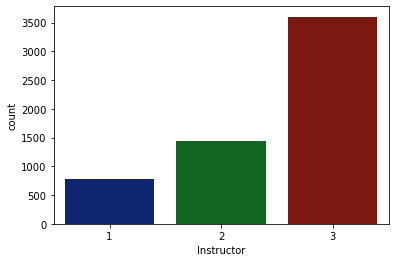

In [15]:
sns.countplot(df['Instructor'])

<AxesSubplot:xlabel='class', ylabel='count'>

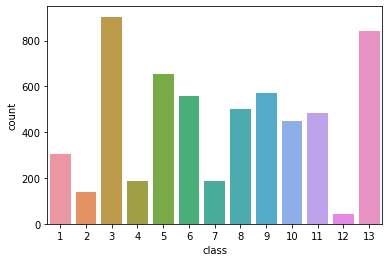

In [16]:
sns.countplot(df['class'])

#### Differnt Courses handled by instructor

<AxesSubplot:xlabel='class', ylabel='count'>

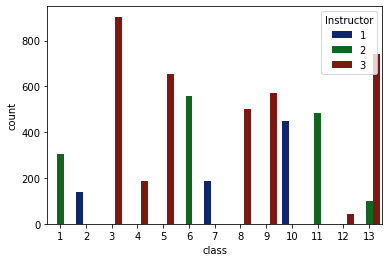

In [17]:

sns.countplot(df['class'],hue=df["Instructor"])

In [18]:
# find mean of questions
x_questions = df.iloc[:, 5:33]
q_mean = x_questions.mean(axis=0)
total_mean = q_mean.mean()

In [19]:
q_mean = q_mean.to_frame('mean')
q_mean.reset_index(level=0, inplace=True)
q_mean.head()

index      mean
0    Q1  2.929897
1    Q2  3.073883
2    Q3  3.178694
3    Q4  3.082474
4    Q5  3.105842

In [20]:
total_mean

3.1861561119293085

#### Total Mean is higher than 2.5. So All are Good Feedback 

Let's make analysis of each instructor

In [21]:
Ins_1=df[  df['Instructor'] == 1 ]
Ins_2=df[  df['Instructor'] == 2 ]
Ins_3=df[  df['Instructor'] == 3 ]

In [22]:
Ins_1["Instructor"].value_counts()

1    775
Name: Instructor, dtype: int64

In [23]:
Ins_2["Instructor"].value_counts()

2    1444
Name: Instructor, dtype: int64

In [24]:
Ins_3["Instructor"].value_counts()

3    3601
Name: Instructor, dtype: int64

In [25]:
# find mean of questions
#Instructor 1
x_questions_Ins_1 = Ins_1.iloc[:, 5:33]
q_mean_Ins_1 = x_questions_Ins_1.mean(axis=0)
total_mean_Ins_1 = q_mean_Ins_1.mean()

#Instructor 2
x_questions_Ins_2 = Ins_2.iloc[:, 5:33]
q_mean_Ins_2 = x_questions_Ins_2.mean(axis=0)
total_mean_Ins_2 = q_mean_Ins_2.mean()

#Instructor 3
x_questions_Ins_3 = Ins_3.iloc[:, 5:33]
q_mean_Ins_3 = x_questions_Ins_3.mean(axis=0)
total_mean_Ins_3 = q_mean_Ins_3.mean()


In [26]:
q_mean_Ins_1 = q_mean_Ins_1.to_frame('mean')
q_mean_Ins_1.reset_index(level=0, inplace=True)
print("Feed back mean of Instructor 1")
q_mean_Ins_1.head()

Feed back mean of Instructor 1


index      mean
0    Q1  3.219355
1    Q2  3.309677
2    Q3  3.367742
3    Q4  3.296774
4    Q5  3.384516

In [27]:
q_mean_Ins_2 = q_mean_Ins_2.to_frame('mean')
q_mean_Ins_2.reset_index(level=0, inplace=True)
print("Feed back mean of Instructor 2")
q_mean_Ins_2.head()

Feed back mean of Instructor 2


index      mean
0    Q1  3.119806
1    Q2  3.293629
2    Q3  3.371191
3    Q4  3.273546
4    Q5  3.308864

In [28]:
q_mean_Ins_3 = q_mean_Ins_3.to_frame('mean')
q_mean_Ins_3.reset_index(level=0, inplace=True)
print("Feed back mean of Instructor 3")
q_mean_Ins_3.head()

Feed back mean of Instructor 3


index      mean
0    Q1  2.791447
1    Q2  2.935018
2    Q3  3.060816
3    Q4  2.959733
4    Q5  2.964454

In [29]:
mean={'Instructor':['Instructor_1','Instructor_2','Instructor_3'],'Mean':[total_mean_Ins_1,total_mean_Ins_2,total_mean_Ins_3]}

d=pd.DataFrame(mean)


In [30]:
d

Instructor      Mean
0  Instructor_1  3.378111
1  Instructor_2  3.394959
2  Instructor_3  3.061114

### Instructor_2 has Better feed back than others

**Till Q8 Course Feed back. Q8 to Q28 Instructor feed back
we have to find which clases are content with course**

In [31]:
high=df.groupby(["class"])[["Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q9","Q10","Q11","Q12"]].mean()


In [32]:
high

Q1        Q2        Q3        Q4        Q5        Q6        Q7  \
class                                                                         
1      3.171617  3.363036  3.399340  3.330033  3.356436  3.316832  3.339934   
2      3.421429  3.492857  3.485714  3.457143  3.607143  3.542857  3.557143   
3      2.828540  2.911504  2.994469  2.933628  2.936947  2.940265  2.926991   
4      2.433155  2.631016  2.887701  2.631016  2.743316  2.780749  2.737968   
5      3.030488  3.146341  3.120427  3.179878  3.181402  3.221037  3.092988   
6      3.098566  3.290323  3.399642  3.275986  3.324373  3.331541  3.308244   
7      2.727273  2.903743  3.117647  2.898396  3.106952  2.812834  2.914439   
8      2.692000  3.020000  3.330000  3.018000  3.006000  3.170000  3.010000   
9      2.849387  3.017513  3.217163  3.066550  3.047285  3.164623  3.071804   
10     3.361607  3.421875  3.435268  3.412946  3.430804  3.455357  3.421875   
11     3.148760  3.278926  3.351240  3.247934  3.276860  3.115702  3.163223   
12     2.780488  3.000000  3.000000  2.902439  2.804878  2.804878  2.756098   
13     2.682521  2.781213  2.879905  2.814507  2.832342  2.788347  2.760999   

             Q8        Q9       Q10       Q11       Q12  
class                                                    
1      3.257426  3.445545  3.382838  3.498350  3.389439  
2      3.600000  3.564286  3.564286  3.585714  3.521429  
3      2.908186  2.942478  2.910398  2.910398  2.893805  
4      2.711230  3.090909  2.786096  2.941176  2.737968  
5      3.048780  3.120427  3.094512  3.048780  2.986280  
6      3.220430  3.333333  3.340502  3.390681  3.284946  
7      3.219251  3.000000  2.930481  3.245989  2.877005  
8      2.942000  3.264000  3.066000  3.472000  2.974000  
9      2.989492  3.157618  3.054291  3.302977  3.052539  
10     3.424107  3.435268  3.437500  3.486607  3.388393  
11     3.183884  3.384298  3.254132  3.338843  3.165289  
12     2.829268  2.951220  2.731707  2.878049  2.609756  
13     2.745541  2.906064  2.813317  2.818074  2.737218

In [33]:
mean_course = high.mean(axis=1)


In [34]:
mean_course

class
1     3.354235
2     3.533333
3     2.919801
4     2.759358
5     3.105945
6     3.299881
7     2.979501
8     3.080333
9     3.082604
10    3.425967
11    3.242424
12    2.837398
13    2.796671
dtype: float64

In [35]:
high["mean_course"]=mean_course


In [36]:
h1=high.sort_values("mean_course",ascending=False)
h1.style.background_gradient(subset='mean_course',cmap='Reds')

**Class 2 has given highest feedback to course content**

## Coorelation Matrix


<AxesSubplot:>

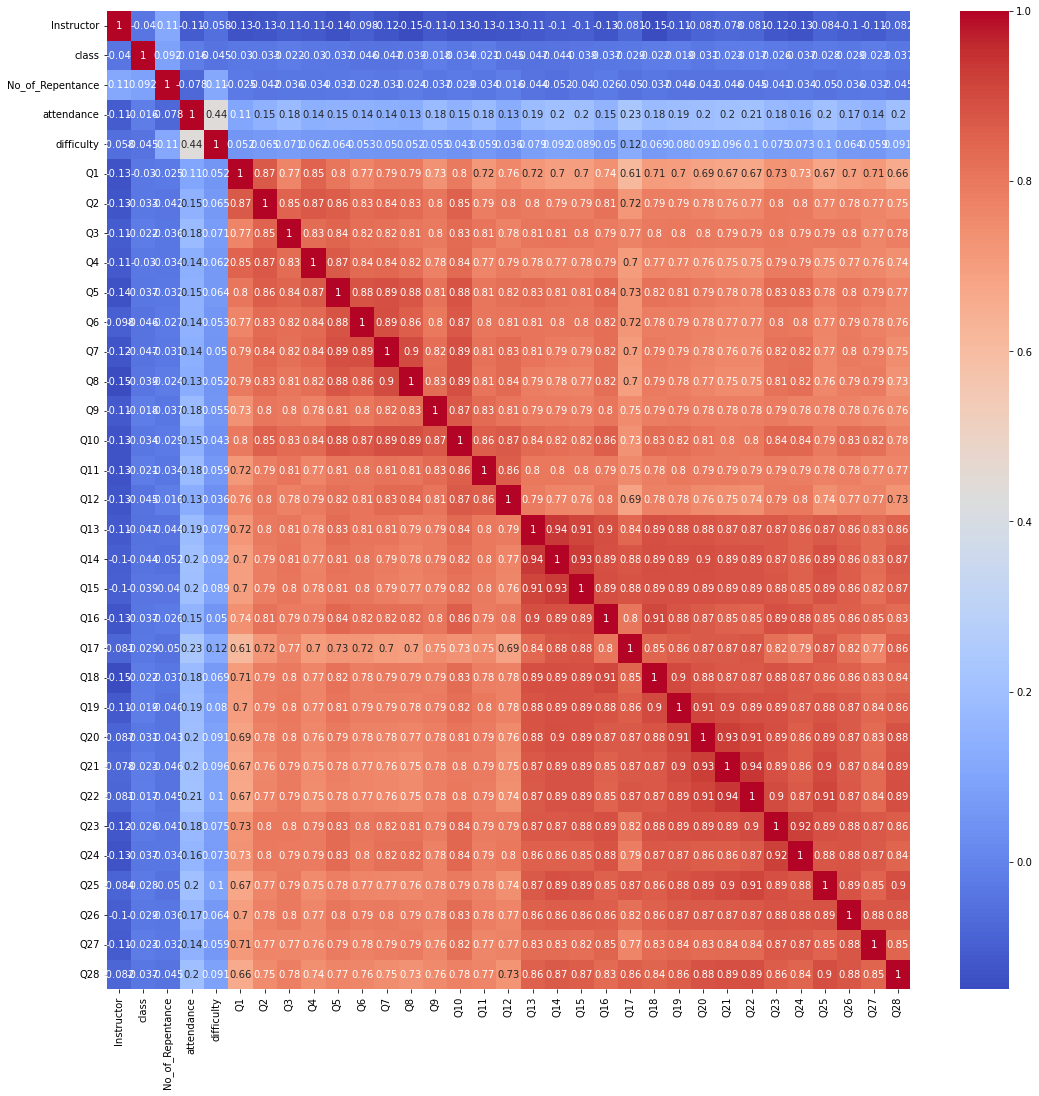

In [37]:
corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## 4. Principal component analysis

In [74]:
X = df.iloc[:, 5:33]

Transformation

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

In [76]:
pca_df = pd.DataFrame(X_pca)
pca_df

0         1         2
0      0.989015  0.522797  0.034425
1      0.989015  0.522797  0.034425
2     -9.591289  0.640795  0.074551
3      0.989015  0.522797  0.034425
4     11.569319  0.404800 -0.005701
...         ...       ...       ...
5815  11.569319  0.404800 -0.005701
5816  -7.351041 -1.534686  0.009041
5817  -9.591289  0.640795  0.074551
5818  11.569319  0.404800 -0.005701
5819  11.569319  0.404800 -0.005701

[5820 rows x 3 columns]

In [77]:
# how much info we retained from the dataset
pca.explained_variance_ratio_.cumsum()[1]

0.8671381678467106

<AxesSubplot:>

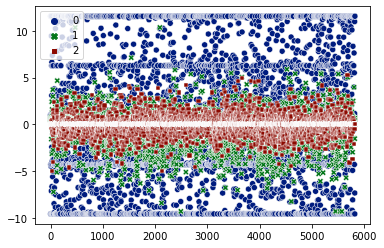

In [78]:
sns.scatterplot( data = X_pca)

## 5.Model Training

In [79]:
# Kmeans clustering
from sklearn.cluster import KMeans
distortions = []
cluster_range = range(1,6)

# elbow method
for i in cluster_range:
    model = KMeans(n_clusters=i, init='k-means++', n_jobs=-1, random_state=42)
    model.fit(X_pca)
    distortions.append(model.inertia_)

In [80]:
plt.plot(cluster_range, distortions, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel('Distortions')
plt.show()

In [81]:
# use best cluster
model = KMeans(n_clusters=3, init='k-means++', n_jobs=-1, random_state=42)
model.fit(X_pca)
y = model.predict(X_pca)

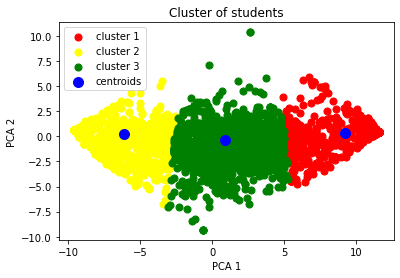

In [82]:
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], s=50, c='red', label='cluster 1')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], s=50, c='yellow', label='cluster 2')
plt.scatter(X_pca[y==2, 0], X_pca[y==2, 1], s=50, c='green', label='cluster 3')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], s=100, c='blue', label='centroids')
plt.title('Cluster of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [83]:
# use another cluster
model = KMeans(n_clusters=4, init='k-means++', n_jobs=-1, random_state=42)
model.fit(X_pca)
y = model.predict(X_pca)

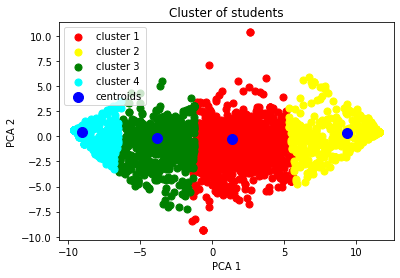

In [84]:
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], s=50, c='red', label='cluster 1')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], s=50, c='yellow', label='cluster 2')
plt.scatter(X_pca[y==2, 0], X_pca[y==2, 1], s=50, c='green', label='cluster 3')
plt.scatter(X_pca[y==3, 0], X_pca[y==3, 1], s=50, c='cyan', label='cluster 4')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], s=100, c='blue', label='centroids')
plt.title('Cluster of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

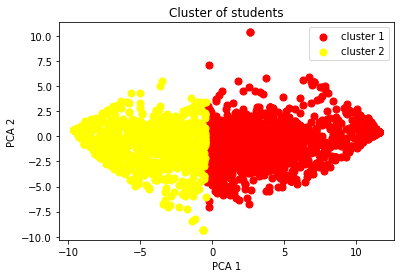

In [85]:
# use another cluster
model = KMeans(n_clusters=2, init='k-means++', n_jobs=-1, random_state=42)
model.fit(X_pca)
y = model.predict(X_pca)
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], s=50, c='red', label='cluster 1')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], s=50, c='yellow', label='cluster 2')
plt.title('Cluster of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [93]:
model = KMeans(n_clusters=3, init='k-means++', n_jobs=-1, random_state=42)
model.fit(X_pca)
y = model.predict(X_pca)
pca_df["y"]=y
pca_df

0         1         2  y
0      0.989015  0.522797  0.034425  2
1      0.989015  0.522797  0.034425  2
2     -9.591289  0.640795  0.074551  1
3      0.989015  0.522797  0.034425  2
4     11.569319  0.404800 -0.005701  0
...         ...       ...       ... ..
5815  11.569319  0.404800 -0.005701  0
5816  -7.351041 -1.534686  0.009041  1
5817  -9.591289  0.640795  0.074551  1
5818  11.569319  0.404800 -0.005701  0
5819  11.569319  0.404800 -0.005701  0

[5820 rows x 4 columns]

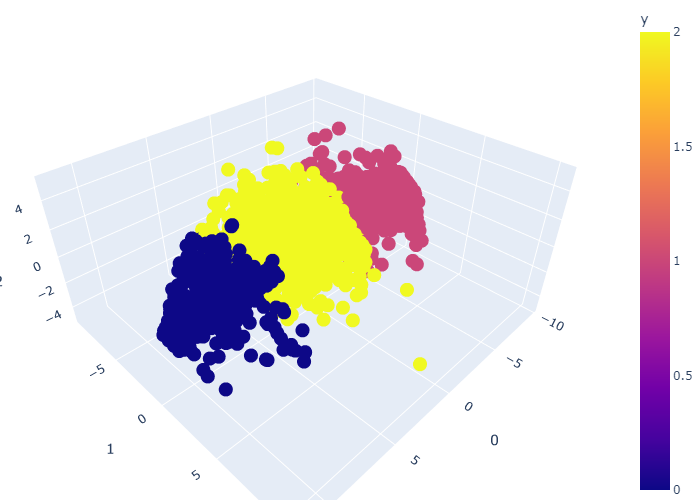

In [94]:
#import plotly.plotly as py

#py.iplot(fig, filename='3d point clustering')

import plotly.express as px
fig=px.scatter_3d(pca_df, x=0, y=1, z=2,
              color='y')
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show("png")


In [95]:
from collections import Counter
Counter(y)

Counter({2: 2358, 1: 2222, 0: 1240})

In [96]:
model = KMeans(n_clusters=3, init='k-means++', n_jobs=-1, random_state=42)
model.fit(X)
y = model.predict(X)

In [97]:
Counter(y)

Counter({0: 2358, 2: 2223, 1: 1239})

In [ ]:
# dendogram
import scipy.cluster.hierarchy as hier
dendogram = hier.dendrogram(hier.linkage(X_pca, method='ward'))
plt.title('Dendogram')
plt.xlabel("Questions")
plt.ylabel("Distance")
plt.show()

In [99]:
#import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly

In [101]:
names=list(X_pca)
dendro = ff.create_dendrogram(X_pca,labels=names)
dendro['layout'].update({'width':2000, 'height':6000})
d=plotly.offline.iplot(dendro, filename='simple_dendrogram')
plt.show("png")

In [ ]:
X_pca